#####
1. Minimise Vol (Scipy Optimise)***
2. Minimise Calmar (Drawdown) (Scipy Optimise)***
3. Minimise Neg sharpe (Scipy Optimise)
4. Momentum Strategy (Simple)***
5. Neural Network (LSTM Model)
6. Hierarchial Risk Parity 
7.

Weighted Average for different strategies???


In [318]:
from quant_risk.statistics import financial_ratios as ratios
from quant_risk.portfolio import portfolio as port
from quant_risk.portfolio.portfolio import MeanVariance
from quant_risk.utils import plot
from quant_risk.utils import fetch_data as fetch_data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
from scipy.optimize import minimize
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [319]:
tickerlist = ['^STI','^GSPC','^RUT','^DJI','^IXIC','^FTSE','^HSI','^NSEI','^VIX','^N225','^KS11','GLD','SHY','TLH','TLT']

In [320]:
df = yf.download(tickerlist, period = '1d', start = '2007-01-01',end = pd.Timestamp.today())

[*********************100%***********************]  15 of 15 completed


In [321]:
columns = df.columns[15:30]

In [322]:
df = df[columns]
df.columns = [['Gold','2 Year Bond','10-20 year Bond','20 Year Bond','Dow','FTSE','S&P500','HSI','Nasdaq','Kospi','Nikkei','Nifty','Russell2k','STI','Vix']]

In [323]:

df = df.round(2)
df

,Gold,2 Year Bond,10-20 year Bond,20 Year Bond,Dow,FTSE,S&P500,HSI,Nasdaq,Kospi,Nikkei,Nifty,Russell2k,STI,Vix
Date,,,,,,,,,,,,,,,
2007-01-02,NaN,NaN,NaN,NaN,NaN,6310.90,NaN,20310.18,NaN,1435.26,NaN,NaN,NaN,NaN,NaN
2007-01-03,62.28,80.04,NaN,89.06,12474.52,6319.00,1416.60,20413.39,2423.16,1409.35,NaN,NaN,787.42,3037.74,12.04
2007-01-04,61.65,80.12,NaN,89.60,12480.69,6287.00,1418.34,20025.58,2453.43,1397.29,17353.67,NaN,789.95,3023.80,11.51
2007-01-05,60.17,80.07,NaN,89.21,12398.01,6220.10,1409.71,20211.28,2434.25,1385.76,17091.59,NaN,775.87,3029.04,12.14
2007-01-08,60.48,80.02,NaN,89.37,12423.49,6194.20,1412.84,20029.66,2438.20,1370.81,NaN,NaN,776.99,3000.00,12.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27,163.64,86.09,148.57,146.37,34869.37,7063.40,4443.11,24208.78,14969.97,3133.64,30240.06,17855.10,2281.00,3100.30,18.76
2021-09-28,162.05,86.10,146.85,144.09,34299.99,7028.10,4352.63,24500.39,14546.68,3097.92,30183.96,17748.60,2229.78,3077.69,23.25
2021-09-29,161.32,86.13,147.01,144.34,34390.72,7108.20,4359.46,24663.50,14512.44,3060.27,29544.29,17711.30,2225.31,3074.31,22.56


In [262]:
returns = (df-df.shift(1))/df.shift(1)
returns

,Gold,2 Year Bond,10-20 year Bond,20 Year Bond,Dow,FTSE,S&P500,HSI,Nasdaq,Kospi,Nikkei,Nifty,Russell2k,STI,Vix
Date,,,,,,,,,,,,,,,
2007-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,NaN,NaN,NaN,NaN,NaN,0.001284,NaN,0.005082,NaN,-0.018053,NaN,NaN,NaN,NaN,NaN
2007-01-04,-0.010116,0.001000,NaN,0.006063,0.000495,-0.005064,0.001228,-0.018998,0.012492,-0.008557,NaN,NaN,0.003213,-0.004589,-0.044020
2007-01-05,-0.024007,-0.000624,NaN,-0.004353,-0.006625,-0.010641,-0.006085,0.009273,-0.007818,-0.008252,-0.015102,NaN,-0.017824,0.001733,0.054735
2007-01-08,0.005152,-0.000624,NaN,0.001794,0.002055,-0.004164,0.002220,-0.008986,0.001623,-0.010788,NaN,NaN,0.001444,-0.009587,-0.011532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27,0.002082,-0.000116,-0.004222,-0.003676,0.002051,0.001688,-0.002776,0.000687,-0.005166,0.002688,-0.000289,0.000106,0.014648,0.012723,0.056901
2021-09-28,-0.009716,0.000116,-0.011577,-0.015577,-0.016329,-0.004998,-0.020364,0.012046,-0.028276,-0.011399,-0.001855,-0.005965,-0.022455,-0.007293,0.239339
2021-09-29,-0.004505,0.000348,0.001089,0.001735,0.002645,0.011397,0.001569,0.006657,-0.002354,-0.012153,-0.021192,-0.002102,-0.002005,-0.001098,-0.029677


## Efficient Frontier

...Data for USTREASURY/YIELD.3 from 2007-01-02 to 2021-10-01 loaded successfully


<AxesSubplot:title={'center':'Efficient Frontier with random portfolios'}, xlabel='Volatility', ylabel='Return'>

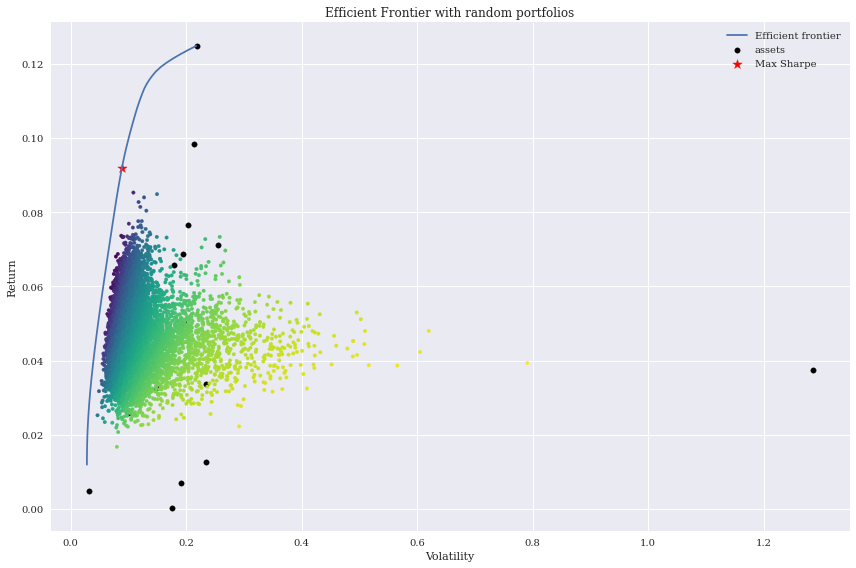

In [263]:
pf = MeanVariance(df)
plot.efficient_frontier(optimizer = pf.portfolio,prices = df)

# Extra Functions

In [264]:

def minimise_volatility(target_return, er, cov):
    '''
    Minimise volatility function will give a SINGLE array of weights for the assets
    for a given return value
    '''
    n = er.shape[0] #n would give the number of assets
    
    #Create a numpy array that repeats 1/n, n number of times
    # Put it into an initial guess where the weights are all equal
    initial_guess = np.repeat(1/n,n) 
    
    bounds = ((0.0,0.2),)*n  #Create a tuple of n number of tuples with 0 and 1 as the values within each tuple
    
    #Create our constraints which must be in a dictionary form
    return_is_target = {
        'type':"eq", #Equality type means that whatever formula is provided in the 'fun' line will be equal to zero
        'args': (er,), #arguments=> Over here it means that expected returns er is the variable argument
                       #and weights is the value we want
        'fun': lambda weights, er: target_return - portfolio_returns(weights, er)
    }
    weights_sum_to_1 = {
        'type':'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    
    max_asset_weight = {
        'type':'ineq',
        'fun':lambda weights: weights
    }
    
    weights_ = minimize(portfolio_variance, initial_guess,
                        #Note that the portfolio variance is another formula here(i.e this is a nested formula, with inputs 
                        #Covariance and weights, BUT we put the cov as an arg in the next line, ie. its a known variable)
                        args = (cov,), method = "SLSQP",
                        constraints = (return_is_target, weights_sum_to_1),
                        bounds = bounds)
    return weights_.x


def portfolio_variance(weights, covariance):
    '''
    To calculate the portfolio variance with the weights and covariance matrix
    We use the portfolio variance formula:
    Weights transpose -> Matrix multiply by covar matrix -> Matrix multiply by weights
    '''
    return (weights.T@ covariance @ weights)**0.5



def pf_returns(weights,df):
    rets = (df-df.shift(1))/df
    allocationWeights.columns = rets.columns
    rets = rets*allocationWeights.astype(float)
    return rets.sum(axis = 1)

def plot_backtest(weights,df):
    (1+pf_returns(weights, df)).cumprod().plot(figsize = (6,5))
    
def semideviation(r):
    semidev = r[r<0].std(ddof = 0)
    return semidev

def portfolio_returns(weights, returns):
    '''
    To calulate the returns from the weights of each asset.
    weights would be a numpy array which is then transposed to form a matrix
    returns is a series consisting of the returns(data) of different assets(index)
    Transpose weights - > Matrix multiplication with returns
    
    '''
    return weights.T @ returns


def resize_data(dataframe,rebal_freq = 5):
    Resizeddf = {}
    counter = 0
    for i in dataframe.index:
        counter +=1
        if counter ==rebal_freq:
            Resizeddf[i]=dataframe.loc[i]
            counter =0
    Resizeddata = pd.DataFrame(Resizeddf.values(), index = Resizeddf.keys(),
                               columns = dataframe.columns)        
    return Resizeddata    
    
    



In [302]:
df['2008-01-01':]

,Gold,2 Year Bond,10-20 year Bond,20 Year Bond,Dow,FTSE,S&P500,HSI,Nasdaq,Kospi,Nikkei,Nifty,Russell2k,STI,Vix
Date,,,,,,,,,,,,,,,
2008-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6144.350098,NaN,NaN,NaN
2008-01-02,84.860001,82.339996,106.160004,94.379997,13043.959961,6416.700195,1447.160034,27560.519531,2609.629883,1853.449951,NaN,6179.399902,753.549988,3461.219971,23.170000
2008-01-03,85.570000,82.470001,106.120003,94.250000,13056.719727,6479.399902,1447.160034,26887.279297,2602.679932,1852.729980,NaN,6178.549805,745.010010,3397.060059,22.490000
2008-01-04,85.129997,82.589996,106.309998,94.269997,12800.179688,6348.500000,1411.630005,27519.689453,2504.649902,1863.900024,NaN,6274.299805,721.599976,3437.790039,23.940001
2008-01-07,84.769997,82.540001,106.610001,94.680000,12827.490234,6335.700195,1416.180054,27179.490234,2499.459961,1831.140015,14500.549805,6279.100098,723.950012,3353.060059,23.790001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27,163.639999,86.089996,148.570007,146.369995,34869.371094,7063.399902,4443.109863,24208.779297,14969.969727,3133.639893,30240.060547,17855.099609,2281.000000,3100.300049,18.760000
2021-09-28,162.050003,86.099998,146.850006,144.089996,34299.988281,7028.100098,4352.629883,24500.390625,14546.679688,3097.919922,30183.960938,17748.599609,2229.780029,3077.689941,23.250000
2021-09-29,161.320007,86.129997,147.009995,144.339996,34390.718750,7108.200195,4359.459961,24663.500000,14512.440430,3060.270020,29544.289062,17711.300781,2225.310059,3074.310059,22.559999


In [345]:
def min_vol_strategy(start_dt,data,lags = 252,rebals_per_year=52,target_return = 0.06):
    data.index = pd.to_datetime(data.index, format = '%Y%m%d')
    data = data[start_dt:]
    
    data = resize_data(data,rebal_freq = int(252/rebals_per_year))
        
    
    returns = ((data-data.shift(1))/data.shift(1)).fillna(0)
    A_weights ={}

    counter = 0
    for i in data.index:
        counter+=1
        start = i-dt.timedelta(days = lags)
        
        if counter >=2 and counter < lags:
            ann_ret = ratios.annualised_returns(returns[start_dt:i],rebals_per_year)
            covv = returns[start:i].cov()
            w = minimise_volatility(target_return,ann_ret,covv)
            A_weights[i]=w
            
        elif counter >= lags:
            try:
                ann_ret = ratios.annualised_returns(returns[start:i],rebals_per_year)
                covv = returns[start:i].cov()
                w = minimise_volatility(target_return,ann_ret,covv)
                A_weights[i]=w
            except:
                adj_start = i-dt.timedelta(days = (lags+4))
                ann_ret = ratios.annualised_returns(returns[adj_start:i],rebals_per_year)
                covv = returns[adj_start:i].cov()
                w = minimise_volatility(target_return,ann_ret,covv)
                A_weights[i]=w
            
    weights = pd.DataFrame(A_weights.values(),index = A_weights.keys(),columns = data.columns)
    return weights

In [346]:
ratios.annualised_returns(returns)

Gold               0.053435
2 Year Bond        0.005279
10-20 year Bond    0.024453
20 Year Bond       0.028830
Dow                0.066606
FTSE              -0.001423
S&P500             0.072953
HSI                0.004834
Nasdaq             0.112899
Kospi              0.071551
Nikkei             0.009573
Nifty              0.054936
Russell2k          0.072475
STI               -0.010049
Vix               -0.198997
dtype: float64

In [347]:
ratios.calmar_ratio(df)

Gold              -0.131078
2 Year Bond       -0.145623
10-20 year Bond   -0.133256
20 Year Bond      -0.117136
Dow               -0.124559
FTSE              -0.018531
S&P500            -0.136423
HSI                0.000102
Nasdaq            -0.227773
Kospi             -0.061456
Nikkei            -0.066349
Nifty             -0.164379
Russell2k         -0.126732
STI                0.014349
Vix                0.017517
dtype: float64

In [438]:
start_dt = '2007-01-01'
end_dt = pd.to_datetime(pd.Timestamp.now())
weights_ts = min_vol_strategy(start_dt = start_dt,data = df,lags = 240,rebals_per_year = 12)

In [441]:
weights_ts

,Gold,2 Year Bond,10-20 year Bond,20 Year Bond,Dow,FTSE,S&P500,HSI,Nasdaq,Kospi,Nikkei,Nifty,Russell2k,STI,Vix
2007-02-28,3.791219e-02,0.067628,4.384276e-02,3.498329e-02,0.093659,0.084058,8.839086e-02,1.146600e-01,8.613763e-02,3.901212e-02,6.571994e-02,7.233680e-02,7.837144e-02,8.096303e-02,1.232521e-02
2007-03-29,8.704975e-17,0.000000,0.000000e+00,0.000000e+00,0.200000,0.000000,1.913449e-01,2.000000e-01,2.000000e-01,1.538072e-16,1.646205e-01,0.000000e+00,0.000000e+00,1.300012e-16,4.403461e-02
2007-04-27,0.000000e+00,0.200000,1.993265e-01,8.487008e-02,0.000000,0.200000,1.356519e-19,9.879957e-03,2.520079e-19,7.332986e-18,4.372647e-03,2.000000e-01,1.015670e-17,1.015508e-01,3.069920e-18
2007-05-28,0.000000e+00,0.200000,1.954400e-01,1.370264e-03,0.000000,0.200000,1.293012e-17,0.000000e+00,6.634540e-19,1.102518e-02,9.966969e-02,2.000000e-01,7.982110e-18,8.868431e-02,3.810567e-03
2007-06-26,0.000000e+00,0.200000,1.261985e-01,7.706624e-02,0.000000,0.200000,0.000000e+00,3.460447e-02,0.000000e+00,2.019224e-02,7.023722e-02,2.000000e-01,2.121101e-17,6.759412e-02,4.107191e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-12,2.000000e-01,0.151926,0.000000e+00,0.000000e+00,0.200000,0.000000,2.000000e-01,0.000000e+00,1.751889e-01,1.061925e-02,3.224509e-18,0.000000e+00,2.528166e-02,0.000000e+00,3.698385e-02
2021-06-10,1.967860e-01,0.155039,0.000000e+00,5.460313e-17,0.200000,0.000000,2.000000e-01,0.000000e+00,1.572921e-01,1.255584e-02,1.009663e-17,0.000000e+00,3.982384e-02,1.416874e-18,3.850331e-02
2021-07-09,1.416142e-01,0.182066,1.119981e-16,2.352719e-17,0.200000,0.000000,2.000000e-01,5.908902e-18,2.000000e-01,0.000000e+00,1.572093e-18,0.000000e+00,3.151496e-02,1.489592e-17,4.480522e-02
2021-08-09,1.415681e-01,0.178884,0.000000e+00,3.911259e-17,0.200000,0.000000,2.000000e-01,2.094882e-17,2.000000e-01,1.463673e-18,2.005774e-18,9.215718e-19,3.536988e-02,2.310706e-18,4.417852e-02


In [360]:
prices_ts = df.loc[weights_ts.index]
prices_ts


,Gold,2 Year Bond,10-20 year Bond,20 Year Bond,Dow,FTSE,S&P500,HSI,Nasdaq,Kospi,Nikkei,Nifty,Russell2k,STI,Vix
2007-02-28,66.48,80.37,101.90,90.15,12268.63,6171.5,1406.82,19651.51,2416.15,1417.34,17604.12,NaN,793.30,3104.15,15.42
2007-03-29,65.65,80.46,100.91,88.45,12348.75,6324.2,1422.53,19821.78,2417.88,1450.95,17263.94,NaN,798.94,3228.88,15.14
2007-04-27,67.56,80.35,100.42,87.83,13120.94,6418.7,1494.07,20526.50,2557.21,1542.52,17400.41,NaN,829.70,3398.60,12.45
2007-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20529.76,NaN,1657.91,17587.59,NaN,NaN,3513.37,NaN
2007-06-26,63.62,80.03,97.05,84.24,13337.66,6559.3,1492.89,21803.57,2574.16,1749.55,18066.11,NaN,826.13,3525.10,18.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-12,170.43,86.26,140.58,135.60,33587.66,7004.6,4063.04,28231.04,13031.68,3161.66,28147.51,14696.50,2135.14,3123.26,27.59
2021-06-10,177.74,86.32,145.72,142.54,34466.24,7088.2,4239.18,28738.88,14020.33,3224.64,28958.56,15737.75,2311.41,3162.50,16.10
2021-07-09,169.21,86.22,149.01,146.53,34870.16,7121.9,4369.55,27344.54,14701.92,3217.95,27940.42,15689.80,2280.00,3131.40,16.18
2021-08-09,161.72,86.18,149.89,147.25,35101.85,7132.3,4432.35,26283.40,14860.18,3260.42,NaN,16258.25,2234.81,NaN,16.72


In [437]:
def backtest_plot(prices_ts, weights_ts):
    prices_ts = prices_ts.loc[weights_ts.index]
    
    returns = ((prices_ts-prices_ts.shift())/prices_ts.shift()).fillna(0)
    returns = 1+returns
    return (returns*weights_ts).sum(axis=1).cumprod().plot(figsize = (10,6))
    

<AxesSubplot:>

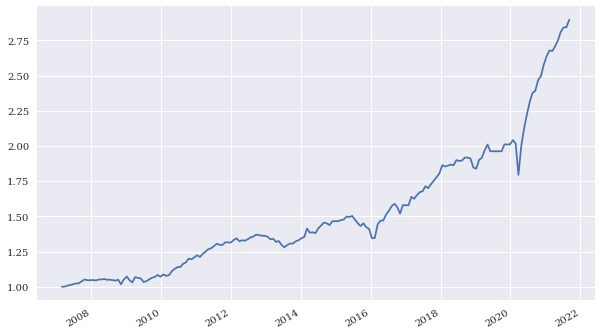

In [380]:
backtest_plot(prices_ts = df, weights_ts = weights_ts)

# VS S&P 500 Returns

<AxesSubplot:xlabel='Date'>

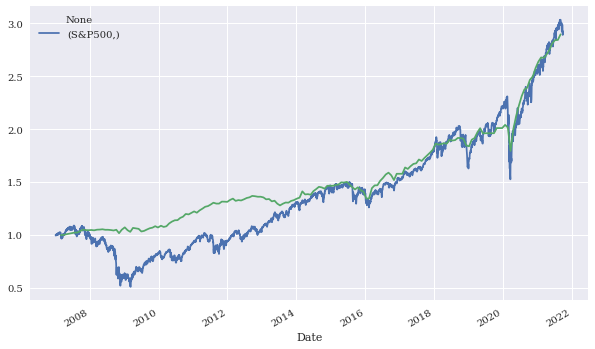

In [442]:
prices_ts = pd.DataFrame(df['S&P500'])
(1+((prices_ts-prices_ts.shift())/prices_ts.shift()).fillna(0)).cumprod().plot(figsize = (10,6))
backtest_plot(prices_ts = df, weights_ts = weights_ts)

# Can tell that in 2008 the min vol protected the portfolio quite well, i.e protect against drawdown but overall returns still lost to S&P500

# Comments


## Cant be not invested in something
## Objective function to reduce turnover ratio and maximise (whichever metric)
## pyomo?

<AxesSubplot:>

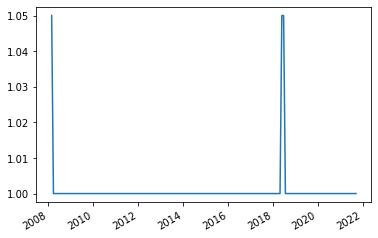

In [54]:
a = a.round(decimals = 10)
a.sum(axis =1).plot()

In [45]:
a.sum(axis = 1).index

DatetimeIndex(['2008-02-27', '2008-03-27', '2008-04-25', '2008-05-26',
               '2008-06-24', '2008-07-23', '2008-08-21', '2008-09-19',
               '2008-10-20', '2008-11-18',
               ...
               '2020-12-25', '2021-01-26', '2021-02-24', '2021-03-25',
               '2021-04-23', '2021-05-24', '2021-06-22', '2021-07-21',
               '2021-08-19', '2021-09-17'],
              dtype='datetime64[ns]', length=169, freq=None)

In [30]:
def momentumstrat(returns)    
    df = returns
    
    
    weights = df.ffill()
    weights = weights.dropna()
    weights = weights.round(5)
    weights = (weights.sub(weights.median(axis=1), axis=0) > 0 ) * 1
    
    weights = weights[(weights != weights.shift(1)).sum(axis=1) > 1]
    weights = weights.div(weights.sum(axis=1), axis=0)

    if verbose:
        print(weights.tail(20))
    weights = weights.dropna()

    return weights

SyntaxError: invalid syntax (<ipython-input-30-e4580e3b0e26>, line 1)

In [27]:
a = [1,2,3]
b = [4,2,5]
dictt = {}
for keyx in a:
    for valuey in b:
        dictt[keyx] = valuey
        b.remove(valuey)
        break

In [37]:
dictt[a[0]]

4

In [21]:
test_keys = ["Rash", "Kil", "Varsha"]
test_values = [1, 4, 5]
res = {}
for key in test_keys:
    for value in test_values:
        res[key] = value
        test_values.remove(value)
        break  

In [39]:
a = [1,2,3]
minht = min(a)

In [40]:
minht

1

In [41]:
a.remove(minht)
a

[2, 3]

In [43]:
a = [1,2,3,4]
xlabels = list(range(len(a)+1))
xlabels.remove(0)
xlabels

[1, 2, 3, 4]

In [52]:
height = [1,2,4]

In [53]:

def maxArea(self, height):
    arealist = []
    height2 = height
    xlabels = list(range(len(height)+1))
    xlabels.remove(0)
    while height:
        minheight = min(height)
        minhtidx = height2.index(minheight)
        for i in range(len(height2)):
            area = minheight * abs(xlabels[i]-xlabels[minhtidx])
            arealist.append(area)
            height.remove(minheight)


    return max(arealist)

In [54]:
maxArea(self = None, height = height)

ValueError: list.remove(x): x not in list

In [61]:
height = [1,2,4]
minheight = min(height)
height.remove(minheight)
height

[2, 4]

In [63]:
arealist = []
height2 = height
xlabels = list(range(len(height)+1))
xlabels.remove(0)
while height:
    minheight = min(height)
    minhtidx = height2.index(minheight)
    for i in range(len(height2)):
        area = minheight * abs(xlabels[i]-xlabels[minhtidx])
        arealist.append(area)
        height.remove(min(height))

In [68]:
height = [1,2,4]
arealist = []
height2 = height
xlabels = list(range(len(height)+1))
xlabels.remove(0)
while height:
    minhtidx = height2.index(min(height))
    for i in range(len(height2)):
        area = minheight * abs(xlabels[i]-xlabels[minhtidx])
        arealist.append(area)
        height.remove(min(height))



In [82]:
height = [1,2,4]
height.remove(4)

In [83]:
height

[1, 2]

In [79]:
min(height)

1

In [73]:
xlabels[2]

3

In [113]:
height = [1,2,4]
minht = min(height)
minhtidx = height.index(minht)
xlabels[minhtidx]

1

In [86]:
height = [1,8,6,2,5,4,8,3,7]
height2 = height.copy()


In [87]:
xlabels = list(range(len(height2)))
xlabels

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [88]:
minhtidx

1

In [89]:
xlabels[minhtidx]

1

In [90]:
height2

[1, 8, 6, 2, 5, 4, 8, 3, 7]

In [91]:
minhtidx

1

In [107]:
minheight

7

In [110]:
xlabels[minhtidx]

8

In [109]:
min(xlabels[minhtidx],xlabels[0])

0

In [111]:
minheight = min(height)
minhtidx = height2.index(minheight)
min(minheight,height2[0])* abs((xlabels[minhtidx]-xlabels[0]))

8

In [104]:
height.remove(min(height))

In [105]:
height

[8, 8, 7]

In [135]:
def maxArea(self, height):
    arealist = []
    xlabels = list(range(len(height)))

    height2 = height
    while height:
        for i in range(len(height2)):
            minheight = min(height)
            minhghtidx = height2.index(minheight)
            area = minheight * abs((xlabels[minhghtidx]-xlabels[i]))
            arealist.append(area)
            if i == (len(height)-1):
                height.remove(minheight)



    return arealist

In [136]:
maxArea(self = None,height =height)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 4,
 2,
 0,
 2,
 4,
 6,
 8,
 10,
 15,
 12,
 9,
 6,
 3,
 0,
 3,
 12,
 8,
 4,
 0,
 4,
 8,
 10,
 5,
 0,
 5,
 10,
 6,
 0,
 6,
 12,
 14,
 7,
 0,
 0,
 8,
 0]

In [34]:
height = [1,8,6,2,5,181,4,8,3,7,2912,182]


In [3]:

def maxArea(self, height):
    arealist = []
    height2 = []
    height2[:] = height[:] #make a height 2 as I am going to slowly remove the minimum values from the height list
    xlabels = list(range(len(height2)))
    height = height
    while height:
        for i in range(len(height2)):
            minheight = min(height)
            minhghtidx = height2.index(minheight)

            area = min(minheight,height2[i]) * abs((xlabels[minhghtidx]-xlabels[i])) #Take the minimum of the minheight and height of the other point
            arealist.append(area) #Append all areas to the arealist
            if i == len(height2)-1:

                height.remove(min(height))



    return max(arealist)

In [35]:
maxArea( height = height)

1086

In [27]:
def maxProfit(prices):
        while True:
            if prices.index(max(prices))== len(prices)-1:
                prices.remove(max(prices))
            elif prices.index(min(prices)) == 0:
                prices.remove(min(prices))
            elif prices.index(min(prices))<prices.index(max(prices)):
                profit = max(prices)-min
                return profit
            elif prices.index(min(prices))>prices.index(max(prices)):
                prices.remove(min(prices))
            elif len(prices) <2:
                return profit
            else: continue
                     

In [33]:
p = [7,1,5,3,6,4]


In [36]:
def maxProfit(prices):
    n = len(prices)
    if len(prices)<2:
        return 0
    maxprofit = 0
    minpx = prices[0]
    for px in prices:
        maxprofit = max(px-minpx,maxprofit)
        minpx = min(minpx,px)
    return maxprofit
    
    

In [37]:
maxProfit(p)

5

In [ ]:

while True:
    print(min(p))

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
